# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# create setting and desired_keys
setting = {'units':'Imperial','appid':api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']


cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []



print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing City # 1 | ziyamet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=ziyamet
City not found. skipping...
Processing City # 2 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=rikitea
Processing City # 3 | hakkari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=hakkari
Processing City # 4 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=taolanaro
City not found. skipping...
Processing City # 5 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=grindavik
Processing City # 6 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=ushuaia
Processing City # 7 | bosaso
http://api.ope

Processing City # 56 | pundaguitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=pundaguitan
Processing City # 57 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=upernavik
Processing City # 58 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=los+llanos+de+aridane
Processing City # 59 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=omboue
Processing City # 60 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=busselton
Processing City # 61 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=yellowknife
Processing City # 62 | kharp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5

Processing City # 113 | mae hong son
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=mae+hong+son
Processing City # 114 | port macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=port+macquarie
Processing City # 115 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=ambon
Processing City # 116 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=lavrentiya
Processing City # 117 | oriximina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=oriximina
Processing City # 118 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=luderitz
Processing City # 119 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd483544

Processing City # 169 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=la+ronge
Processing City # 170 | pocone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=pocone
Processing City # 171 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=cherskiy
Processing City # 172 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=hasaki
Processing City # 173 | juegang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=juegang
Processing City # 174 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=padang
Processing City # 175 | bargal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=bargal
Cit

Processing City # 225 | bad mergentheim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=bad+mergentheim
Processing City # 226 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=russell
Processing City # 227 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=carnarvon
Processing City # 228 | olga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=olga
Processing City # 229 | fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=fukue
Processing City # 230 | ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=ucluelet
Processing City # 231 | shakhovskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553

City not found. skipping...
Processing City # 280 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=broome
Processing City # 281 | pare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=pare
Processing City # 282 | westpunt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=westpunt
City not found. skipping...
Processing City # 283 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=nouadhibou
Processing City # 284 | roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=roebourne
Processing City # 285 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=airai
Processing City # 286 | almeirim
http://api.openweathermap.org/data/2.5/weather?units=

Processing City # 335 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=buraydah
Processing City # 336 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=flin+flon
Processing City # 337 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=san+patricio
Processing City # 338 | glamoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=glamoc
Processing City # 339 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=mount+gambier
Processing City # 340 | lerwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=lerwick
Processing City # 341 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b

Processing City # 393 | price
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=price
Processing City # 394 | asahikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=asahikawa
Processing City # 395 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=ulladulla
Processing City # 396 | belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=belyy+yar
Processing City # 397 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=kahului
Processing City # 398 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=berlevag
Processing City # 399 | salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526

Processing City # 450 | sjoholt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=sjoholt
Processing City # 451 | osakarovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=osakarovka
Processing City # 452 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=richards+bay
Processing City # 453 | maxixe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=maxixe
Processing City # 454 | yayva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=yayva
Processing City # 455 | karaton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=karaton
Processing City # 456 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa5

Processing City # 507 | sohag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=sohag
Processing City # 508 | abu samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=abu+samrah
Processing City # 509 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=tautira
Processing City # 510 | segezha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=segezha
Processing City # 511 | saint-leu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=saint-leu
Processing City # 512 | san juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=san+juan
Processing City # 513 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q

Processing City # 564 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=namibe
Processing City # 565 | kegayli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=kegayli
City not found. skipping...
Processing City # 566 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=xining
Processing City # 567 | marrakesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=marrakesh
Processing City # 568 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=adrar
Processing City # 569 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa553526773b&q=lasa
Processing City # 570 | shaoyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=59513dd4835442b1701faa5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()
weather_df.to_csv(output_data_file)

In [45]:
weather_df.count()

City               562
Cloudiness         562
Country            562
Date               562
Humidity           562
Lat                562
Lng                562
Max Temperature    562
Wind Speed         562
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

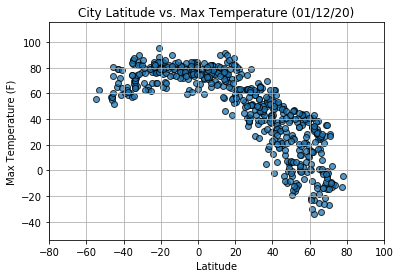

In [46]:

def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(weather_df[y])-20,max(weather_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))
    
lat_temp = plot_lat(y='Max Temperature',y_label='Max Temperature (F)')
lat_temp

#### Latitude vs. Humidity Plot

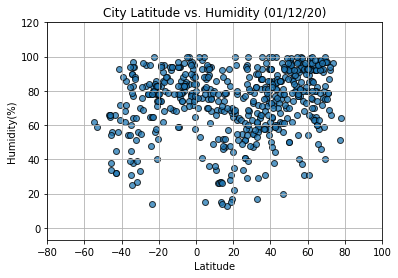

In [47]:
lat_humidity = plot_lat(y='Humidity',y_label='Humidity(%)')

lat_humidity

#### Latitude vs. Cloudiness Plot

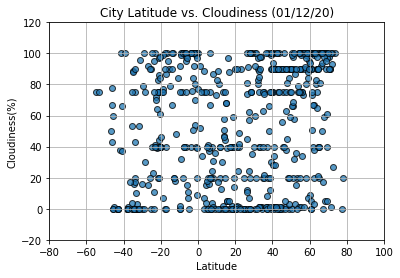

In [48]:
lat_cloud = plot_lat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

#### Latitude vs. Wind Speed Plot

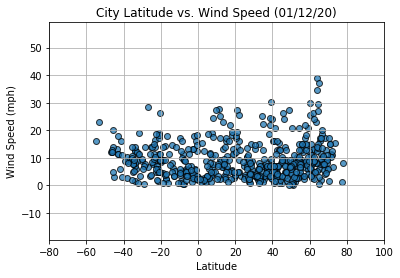

In [49]:
lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind
